In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Load the Yelp data

In [2]:
df = pd.read_csv(r"D:\LIUZHICHENG\Udemy\Machine Learning\8 Real World Projects\Natural Language Processing - Yelp Reviews\yelp.csv")
df = df.drop(columns=["business_id", "date", "review_id", "type", "user_id"])
df.head()

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [3]:
df["length"] = df["text"].apply(func=len)
df

,stars,text,cool,useful,funny,length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0,668
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0,881
9997,4,I recently visited Olive and Ivy for business ...,0,0,0,1425
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0,880


## EDA

In [4]:
df["length"].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [5]:
df.nlargest(n=1, columns="length")

,stars,text,cool,useful,funny,length
55,4,"In our continuing quest to identify cool, loca...",0,1,0,4997


In [6]:
df["length"].idxmax()

55

In [7]:
df.iloc[df["length"].idxmax()]

stars                                                     4
text      In our continuing quest to identify cool, loca...
cool                                                      0
useful                                                    1
funny                                                     0
length                                                 4997
Name: 55, dtype: object

In [8]:
df.nsmallest(n=1, columns="length")

,stars,text,cool,useful,funny,length
6450,3,X,0,0,0,1


In [9]:
df["length"].idxmin()

6450

In [10]:
df.iloc[df["length"].idxmin()]

stars     3
text      X
cool      0
useful    0
funny     0
length    1
Name: 6450, dtype: object

<AxesSubplot:xlabel='stars', ylabel='count'>

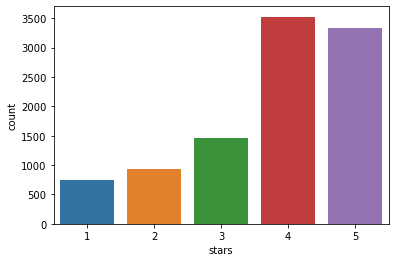

In [11]:
sns.countplot(data=df, x="stars")

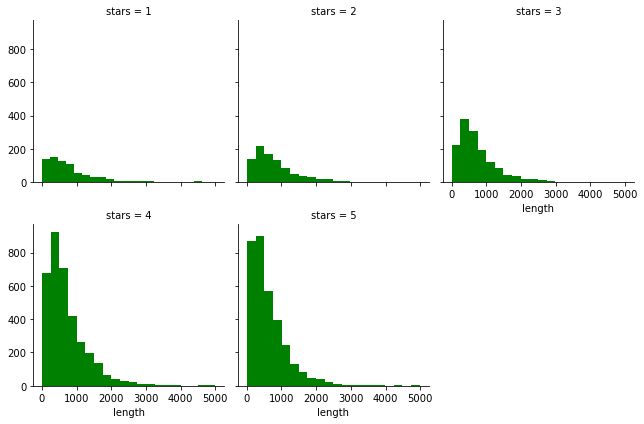

In [12]:
g = sns.FacetGrid(data=df, col="stars", col_wrap=3)
g.map(plt.hist, "length", bins=20, color="g");

In [13]:
tmp = df[df["stars"].isin(values=[1, 5])]
tmp["stars"].value_counts() / len(tmp) * 100

5    81.669114
1    18.330886
Name: stars, dtype: float64

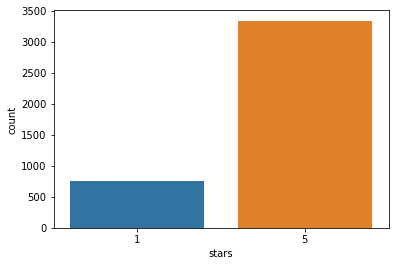

In [14]:
sns.countplot(data=tmp, x="stars");

In [15]:
text1 = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [16]:
import string
string.punctuation

from nltk.corpus import stopwords
stopwords.words("english")

def message_cleaning(text):
    # char
    text_punc_removed = "".join([char for char in text if char not in string.punctuation]) 
    # word
    text_stopwords_removed = " ".join([word for word in text_punc_removed.split() if word.lower() 
                                       not in stopwords.words("english")])
#     text_stopwords_removed = [word for word in text_punc_removed.split() if word.lower() not in stopwords.words("english")]
    return text_stopwords_removed

In [17]:
message_cleaning(text1)

'Hello Mr Future happy learning AI'

In [18]:
%%time
df["text"].apply(func=message_cleaning)

Wall time: 4min 47s


0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate Rice good also dig candy selec...
3       Rosie Dakota LOVE Chaparral Dog Park convenien...
4       General Manager Scott Petello good egg go deta...
                              ...                        
9995    First visitHad lunch today used Groupon ordere...
9996    called house deliciousness could go item item ...
9997    recently visited Olive Ivy business last week ...
9998    nephew moved Scottsdale recently bunch friends...
9999    45 locations 45 star average think Arizona rea...
Name: text, Length: 10000, dtype: object

In [19]:
df = pd.read_csv(r"D:\LIUZHICHENG\Udemy\Machine Learning\8 Real World Projects\Natural Language Processing - Yelp Reviews\yelp.csv")
df = df.drop(columns=["business_id", "date", "review_id", "type", "user_id"])
df.head()

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [20]:
#  df = df[df["stars"].isin(values=[1, 5])]

## Text Preprocessing

In [21]:
%%time

import string
import re
import nltk
from nltk.corpus import stopwords

def remove_punctuation(input_text):

    """ Remove punctuations like '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' """

    #print("in remove_punctuation\n",input_text)
    # Make translation table
    input_text = str(input_text) # avoid thedange of being a series object
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
    return input_text.translate(trantab).encode('ascii', 'ignore').decode('utf8') # -> Final kick to clean up :)


def remove_digits(input_text):

    """ Remove numerical digits ranging from 0-9 """
    #print("in remove_digits\n",input_text)
    return re.sub('\d+', '', input_text)

   
def to_lower(input_text):

    """ String handling, returns the lowercased strings from the given string """
    #print("in to_lower\n",input_text)
    return input_text.lower()


def remove_stopwords(input_text):

    """ Remove the low-level information from our text in order to give more focus to the important information """
   #print("in remove_stopwords\n",input_text)
    stopwords_list = stopwords.words('english')
    newStopWords = ['citi']
    stopwords_list.extend(newStopWords)

    # Some words which might indicate a certain sentiment are kept via a whitelist
    #whitelist = ["n't", "not", "no"]
    whitelist = ["n't"]
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 2]         
    return " ".join(clean_words) # list -> string

 
def expandShortsForms(input_text):
    #print("in expandShortsForms\n",input_text)
    return input_text.replace("can't", "can not").replace("won't", "will not")


def lemmatize(input_text):

    """ Return the base or dictionary form of a word, lemma """
    #print("in lemmatize\n",input_text)
    outtext= ""
    # Lemmatize
    from nltk.stem import WordNetLemmatizer
    from nltk import pos_tag, word_tokenize, wordnet
    from nltk.corpus.reader.wordnet import WordNetError
    lemmatizer = WordNetLemmatizer()

    input_text = input_text.split()
    for word in input_text:
        # Get the single character pos constant from pos_tag like this:
        pos_label = (pos_tag(word_tokenize(word))[0][1][0]).lower()

        # pos_refs = {'n': ['NN', 'NNS', 'NNP', 'NNPS'],
        #            'v': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
        #            'r': ['RB', 'RBR', 'RBS'],
        #            'a': ['JJ', 'JJR', 'JJS']}

        if pos_label == 'j': pos_label = 'a'    # 'j' <--> 'a' reassignment

        if pos_label in ['r']:  # For adverbs it's a bit different
            try:
                if len(wordnet.wordnet.synset(word+'.r.1').lemmas()[0].pertainyms()) > 0:
                    outtext = outtext + ' ' +  (wordnet.wordnet.synset(word+'.r.1').lemmas()[0].pertainyms()[0].name())
            except WordNetError:
                pass
            outtext = outtext + ' ' + word # To keep the word in the list
        elif pos_label in ['a', 's', 'v']: # For adjectives and verbs
            outtext = outtext +' ' + (lemmatizer.lemmatize(word, pos=pos_label))
        else:   # For nouns and everything else as it is the default kwarg
            outtext = outtext +' ' + (lemmatizer.lemmatize(word))
       
    return outtext

       
def execute_funcs(input_text, *args):
    funcs = list(args)
    for func in funcs:
        input_text = func(input_text)
    return input_text


def apply_funcs(input_text):
    clean_X = execute_funcs(input_text, to_lower, remove_punctuation, remove_digits, 
                            remove_stopwords, 
                            expandShortsForms, 
#                             lemmatize
                           )
    return clean_X

Wall time: 0 ns


### Pipeline & ColumnTransformer

In [22]:
%%time

import warnings
warnings.filterwarnings('ignore')

df["clean_text"] = df["text"].apply(func=apply_funcs)
df["length"] = df["clean_text"].apply(func=len)

feature_columns = ['cool', 'useful', 'funny', 'clean_text', 'length']

X = df[feature_columns]
y = df["stars"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y_train = enc.fit_transform(y=y_train)
y_test = enc.transform(y=y_test)

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer

# Whenever the transformer expects a 1D array as input, the columns were specified as a string ("xxx"). 
# For the transformers which expects 2D data, we need to specify the column as a list of strings (["xxx"]).
ct = ColumnTransformer(transformers=[
    ("TfidfVectorizer", TfidfVectorizer(), ("clean_text")),
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), (["cool", "useful", "funny"])),
    ('Normalizer', Normalizer(), (["length"])),
    ],
    n_jobs=-1)

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline(steps=[
    ("ColumnTransformer", ct),
    ("MultinomialNB", MultinomialNB())
]) 

clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00       292
           3       0.38      0.87      0.53       705
           4       0.62      0.36      0.45       668

    accuracy                           0.43      2000
   macro avg       0.20      0.25      0.20      2000
weighted avg       0.34      0.43      0.34      2000

0.4265
[[  0   0   0 125  25]
 [  0   0   0 174  11]
 [  0   0   0 271  21]
 [  0   0   0 613  92]
 [  0   0   0 428 240]]
Wall time: 10.9 s


In [23]:
from sklearn import set_config
set_config(display="diagram")

clf

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(),
                                                  'clean_text'),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cool', 'useful', 'funny']),
                                                 ('Normalizer', Normalizer(),
                                                  ['length'])])),
                ('MultinomialNB', MultinomialNB())])

### make_pipeline & make_column_transformer

In [24]:
%%time

import warnings
warnings.filterwarnings('ignore')

df["clean_text"] = df["text"].apply(func=apply_funcs)
df["length"] = df["clean_text"].apply(func=len)

feature_columns = ['cool', 'useful', 'funny', 'clean_text', 'length']

X = df[feature_columns]
y = df["stars"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y_train = enc.fit_transform(y=y_train)
y_test = enc.transform(y=y_test)

from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer

# This is a shorthand for the ColumnTransformer constructor; it does not require, and does not permit, naming the 
# transformers.
ct = make_column_transformer(
    (CountVectorizer(), ("clean_text")),
    (OneHotEncoder(handle_unknown='ignore'), (["cool", "useful", "funny"])), 
    (StandardScaler(), (["length"])),
    n_jobs=-1)

from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB

# This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. 
# Instead, their names will be set to the lowercase of their types automatically.
clf = make_pipeline(ct, LGBMClassifier()) 

clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.49      0.54       150
           1       0.46      0.26      0.34       185
           2       0.39      0.22      0.28       292
           3       0.49      0.60      0.54       705
           4       0.59      0.65      0.62       668

    accuracy                           0.52      2000
   macro avg       0.51      0.45      0.46      2000
weighted avg       0.52      0.52      0.51      2000

0.524
[[ 73  24  14  21  18]
 [ 27  49  37  55  17]
 [  5  20  64 157  46]
 [  7  11  42 425 220]
 [  6   2   9 214 437]]
Wall time: 11.2 s


In [25]:
from sklearn import set_config
set_config(display="diagram")

clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(),
                                                  'clean_text'),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cool', 'useful', 'funny']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['length'])])),
                ('lgbmclassifier', LGBMClassifier())])

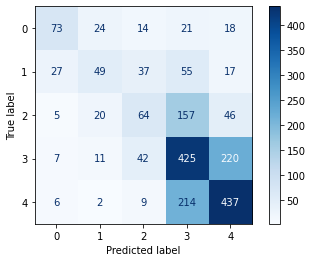

In [26]:
from sklearn.metrics import plot_confusion_matrix

display = plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, cmap="Blues", values_format='.3g')

In [27]:
display.confusion_matrix

array([[ 73,  24,  14,  21,  18],
       [ 27,  49,  37,  55,  17],
       [  5,  20,  64, 157,  46],
       [  7,  11,  42, 425, 220],
       [  6,   2,   9, 214, 437]], dtype=int64)